# Day9. 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [2]:
!pip install face_recognition

     |████████████████████████████████| 100.2MB 41kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=a00811a1c66e710243c119c316eb3a23d7ffe6e62d185ae8902baf8e8a0d573a
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


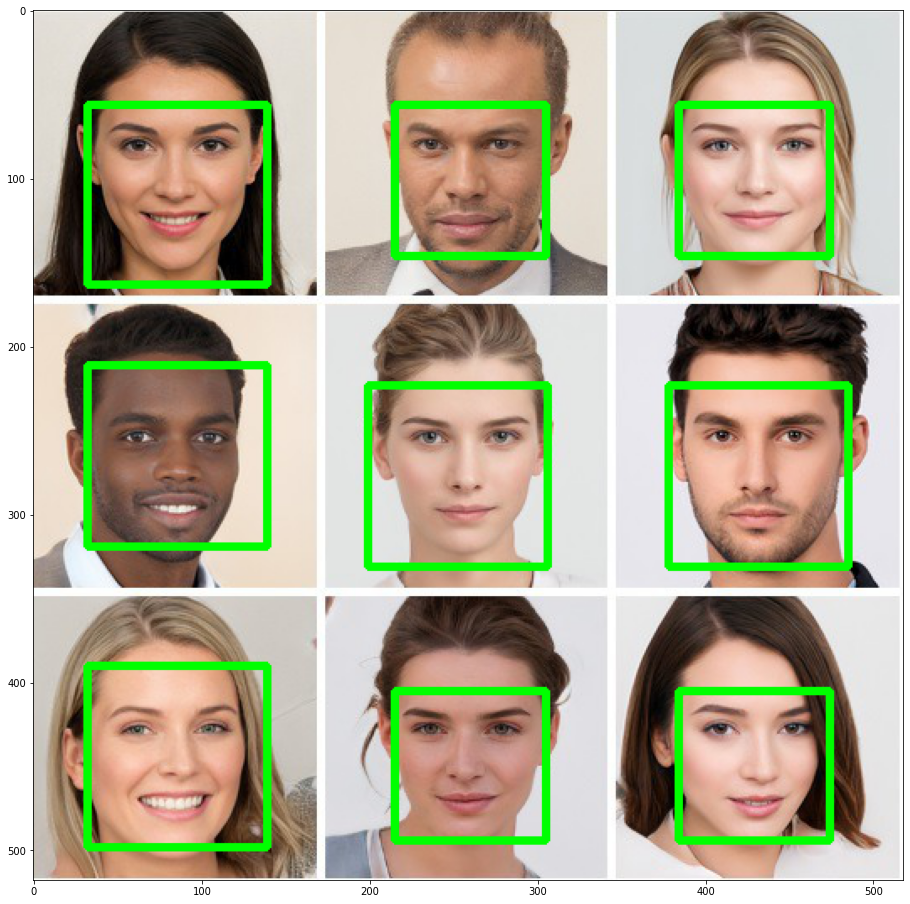

In [8]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

image_path = "/gdrive/My Drive/colab/faces.jpg"
image = fr.load_image_file(image_path)
face_location = fr.face_locations(image)

for (top, right, bottom, left) in face_location:
  cv2.rectangle(image, (left, top), (right, bottom), (0, 255, 0), 3)

plt.rcParams["figure.figsize"] = (16, 16)
plt.imshow(image)
plt.show()

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [0]:
plt.rcParams["figure.figsize"] = (1,1)

known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/son1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/park.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/ki.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/colab/hwang.jpg"))

In [0]:
known_face_list = []
for person in known_person_list:
  top, right, bottom, left = fr.face_locations(person)[0]
  face_image = person[top:bottom, left:right]

  known_face_list.append(face_image)

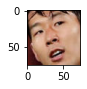

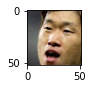

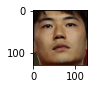

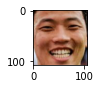

In [18]:
for face in known_face_list:
  plt.imshow(face)
  plt.show()

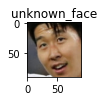

In [19]:
unknown_person = fr.load_image_file("/gdrive/My Drive/colab/son2.jpg")

top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

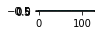

In [20]:
enc_unknown_face = fr.face_encodings(unknown_face)

plt.imshow(enc_unknown_face)
plt.show()

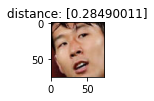

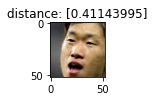

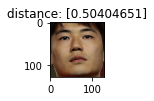

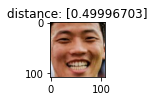

In [21]:
for face in known_face_list:
  enc_known_face = fr.face_encodings(face)
  distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

  plt.title("distance: " + str(distance))
  plt.imshow(face)
  plt.show()